# Imports

In [12]:
import numpy as np

import constants.constants as cst
import constants.paths as pth
from src.preprocessing import preprocess_data
from src.strategies import predict_rates
from src.utils.cumulative_probability import plot_cumulative_probability
from src.utils.format_loans import format_loans_for_submission
from src.utils.load_data import load_data
from src.utils.model_utils import load_model


In [13]:
data_to_predict = load_data(pth.NEW_LOANS_PATH_2)

# Load preprocessor
preprocessor = load_model(
    model_name="XGBoost_Calibrated_Optimized_Full_Training_Set_preprocessor",
    model_type="sklearn",
)

preprocessed_data_to_predict, _, _ = preprocess_data(
    data_to_predict, preprocessor=preprocessor, fit=False
)

2025-10-26 12:39:44.819 | INFO     | src.utils.model_utils:load_model:67 - Model loaded from: /home/augustin/projects/xhec_dsb/05_intro_to_finance_for_data_scientists/models/XGBoost_Calibrated_Optimized_Full_Training_Set_preprocessor.pkl
2025-10-26 12:39:44.820 | INFO     | src.preprocessing:preprocess_data:67 - Applying log transformation to income
2025-10-26 12:39:44.822 | INFO     | src.preprocessing:preprocess_data:82 - Transforming data with existing preprocessor.


In [14]:
# Make predictions
model = load_model(
    model_name="XGBoost_Calibrated_Optimized_Full_Training_Set", model_type="sklearn"
)

proba_predictions = model.predict_proba(preprocessed_data_to_predict)[:, 1]

2025-10-26 12:39:44.875 | INFO     | src.utils.model_utils:load_model:67 - Model loaded from: /home/augustin/projects/xhec_dsb/05_intro_to_finance_for_data_scientists/models/XGBoost_Calibrated_Optimized_Full_Training_Set.pkl


In [15]:
data_to_predict[cst.DEFAULT_PROBABILITY] = proba_predictions

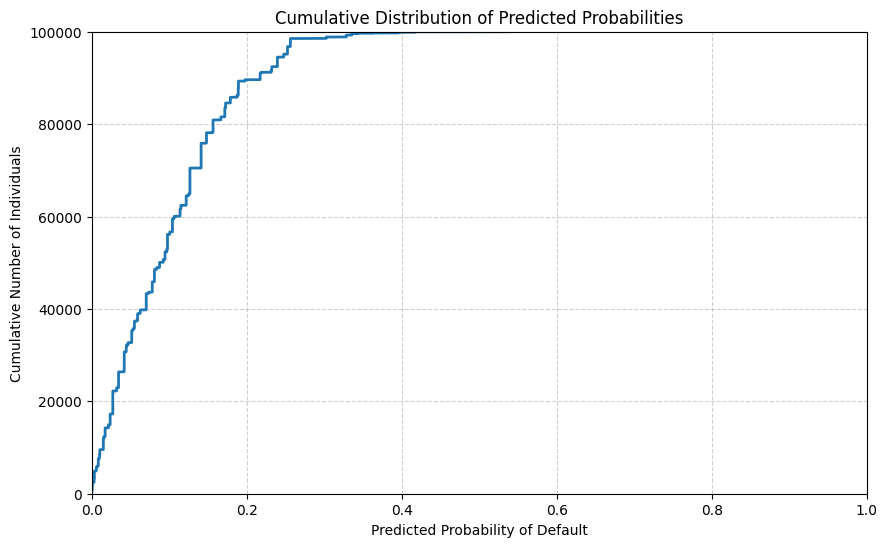

In [16]:
plot_cumulative_probability(data_to_predict[cst.DEFAULT_PROBABILITY])

In [17]:
# Coefficients obtained from previous optimization notebooks (round_1_res.ipynb)

data_to_predict_with_rates = predict_rates(
    data_to_predict,
    linear_params={
        "alpha_0": np.float64(0.03368421052631579),
        "alpha_1": np.float64(0.32),
        "delta": np.float64(0.01),
    },
    quadratic_params={
        "beta_0": np.float64(0.03368421052631579),
        "beta_1": np.float64(0.2844827586206896),
        "beta_2": np.float64(0.368421052631579),
        "gamma": np.float64(0.01),
    },
)

In [18]:
data_to_predict_with_rates.describe()

,id,married,income,signal2,default_probability,break_even_rate,linear_rate,quadratic_rate
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,150000.500000,0.611390,7.841981,0.417474,0.099337,0.119017,0.184401,0.186608
std,28867.657797,0.487437,3.675219,0.325129,0.075871,0.104638,0.128032,0.132894
min,100001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033684,0.033684
25%,125000.750000,0.000000,8.584852,0.064363,0.034326,0.035546,0.080215,0.079430
50%,150000.500000,1.000000,9.147294,0.448797,0.087261,0.095603,0.157211,0.156917
75%,175000.250000,1.000000,9.773393,0.697103,0.140932,0.164052,0.242835,0.245147
max,200000.000000,1.000000,13.815512,0.999956,0.537037,1.160000,1.000000,1.000000


In [19]:
data_to_predict_with_rates

,id,sex,employment,married,income,signal2,default_probability,break_even_rate,linear_rate,quadratic_rate
0,100001,M,employed,1,9.004545,0.000000,0.126493,0.144811,0.218973,0.220375
1,100002,M,employed,1,9.456810,0.693039,0.041764,0.043585,0.090633,0.089793
2,100003,M,employed,1,9.664977,0.546165,0.041764,0.043585,0.090633,0.089793
3,100004,F,employed,1,13.551759,0.000000,0.001193,0.001195,0.035261,0.035219
4,100005,M,employed,1,10.226802,0.551965,0.017064,0.017360,0.056505,0.056006
...,...,...,...,...,...,...,...,...,...,...
99995,199996,M,student,0,9.635150,0.980649,0.021295,0.021758,0.062257,0.061667
99996,199997,F,unemployed,1,0.000000,0.547004,0.239364,0.314690,0.424970,0.437578
99997,199998,M,employed,1,9.662562,0.797885,0.034326,0.035546,0.080215,0.079430
99998,199999,F,unemployed,0,0.000000,0.626529,0.232099,0.302251,0.410207,0.421810


In [20]:
formatted_submission = format_loans_for_submission(
    loans=data_to_predict_with_rates, strategy="linear", save=False, round=3
)

In [21]:
formatted_submission.describe()

,id,rate
count,100000.000000,100000.000000
mean,150000.500000,0.184401
std,28867.657797,0.128032
min,100001.000000,0.033684
25%,125000.750000,0.080215
50%,150000.500000,0.157211
75%,175000.250000,0.242835
max,200000.000000,1.000000
